In [6]:
# Install the yfinance
#!pip install 
#!pip install tensorflow

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

### 1. Data Collection

In [15]:
# To find the ticket name go to yahoo finance
# https://finance.yahoo.com/markets/stocks/most-active/

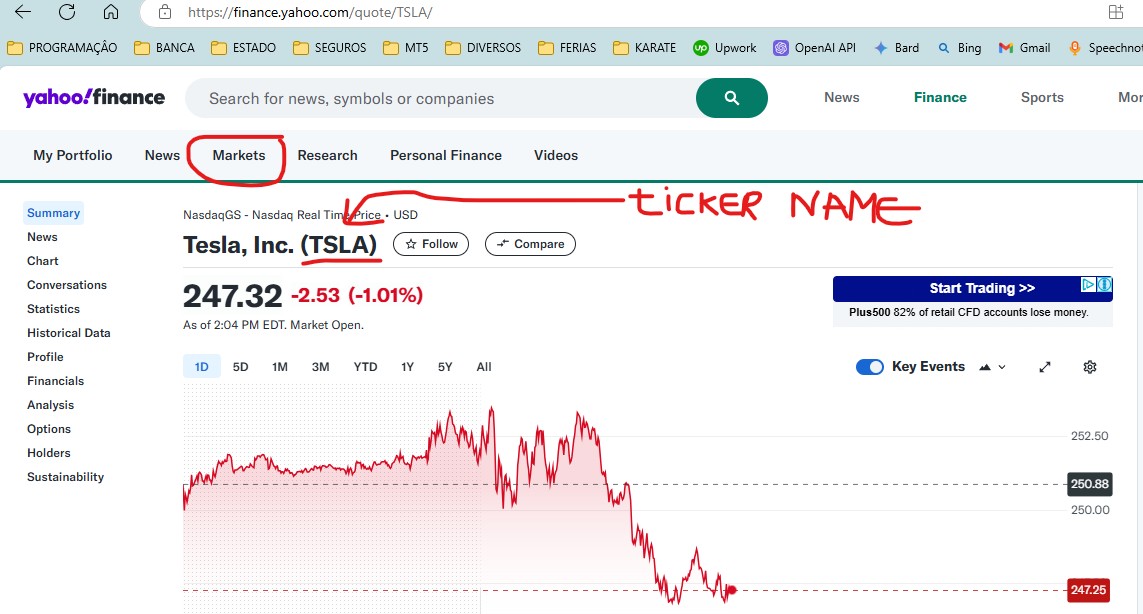

In [8]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-11-07 00:00:00+00:00,24.302620,27.252501,27.330000,27.137501,27.187500,134766000
2014-11-10 00:00:00+00:00,24.262493,27.207500,27.332500,27.167500,27.254999,108782000
2014-11-11 00:00:00+00:00,24.456446,27.424999,27.437500,27.100000,27.174999,109769200
2014-11-12 00:00:00+00:00,24.802000,27.812500,27.857500,27.342501,27.344999,187769600
2014-11-13 00:00:00+00:00,25.152020,28.205000,28.362499,27.900000,27.950001,238091600
...,...,...,...,...,...,...
2024-11-01 00:00:00+00:00,222.910004,222.910004,225.350006,220.270004,220.970001,65276700
2024-11-04 00:00:00+00:00,222.009995,222.009995,222.789993,219.710007,220.990005,44944500


In [9]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-11-07 00:00:00+00:00,24.302620,27.252501,27.330000,27.137501,27.187500,134766000
2014-11-10 00:00:00+00:00,24.262493,27.207500,27.332500,27.167500,27.254999,108782000
2014-11-11 00:00:00+00:00,24.456446,27.424999,27.437500,27.100000,27.174999,109769200
2014-11-12 00:00:00+00:00,24.802000,27.812500,27.857500,27.342501,27.344999,187769600
2014-11-13 00:00:00+00:00,25.152020,28.205000,28.362499,27.900000,27.950001,238091600


In [10]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-11-01 00:00:00+00:00,222.910004,222.910004,225.350006,220.270004,220.970001,65276700
2024-11-04 00:00:00+00:00,222.009995,222.009995,222.789993,219.710007,220.990005,44944500
2024-11-05 00:00:00+00:00,223.449997,223.449997,223.949997,221.139999,221.800003,28111300
2024-11-06 00:00:00+00:00,222.720001,222.720001,226.070007,221.190002,222.610001,54495200
2024-11-07 00:00:00+00:00,225.779999,225.779999,226.550003,224.570007,224.625000,4983332


### 2. Data Exploration & Visualization

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.shape

(2517, 6)

In [13]:
df.isna().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [14]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,91.270379,93.295235,94.215743,92.285308,93.221526,1.191217e+08
std,63.870744,63.358518,63.965418,62.683813,63.305438,6.874251e+07
min,20.720032,22.584999,22.917500,22.367500,22.500000,4.983332e+06
25%,33.701836,36.072498,36.365002,35.862499,36.112499,7.323400e+07
50%,59.650414,61.380001,62.437500,60.305000,61.630001,1.020984e+08
75%,148.542679,150.429993,151.490005,148.490005,149.899994,1.453648e+08
max,236.479996,236.479996,237.490005,234.449997,236.479996,6.488252e+08


In [15]:
df.dtypes

Price      Ticker
Adj Close  AAPL      float64
Close      AAPL      float64
High       AAPL      float64
Low        AAPL      float64
Open       AAPL      float64
Volume     AAPL        int64
dtype: object

In [16]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-11-07 00:00:00+00:00,24.302620,27.252501,27.330000,27.137501,27.187500,134766000
2014-11-10 00:00:00+00:00,24.262493,27.207500,27.332500,27.167500,27.254999,108782000
2014-11-11 00:00:00+00:00,24.456446,27.424999,27.437500,27.100000,27.174999,109769200
2014-11-12 00:00:00+00:00,24.802000,27.812500,27.857500,27.342501,27.344999,187769600
2014-11-13 00:00:00+00:00,25.152020,28.205000,28.362499,27.900000,27.950001,238091600


In [17]:
df.reset_index(inplace=True)

In [18]:
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2014-11-07 00:00:00+00:00,24.302620,27.252501,27.330000,27.137501,27.187500,134766000
1,2014-11-10 00:00:00+00:00,24.262493,27.207500,27.332500,27.167500,27.254999,108782000
2,2014-11-11 00:00:00+00:00,24.456446,27.424999,27.437500,27.100000,27.174999,109769200
3,2014-11-12 00:00:00+00:00,24.802000,27.812500,27.857500,27.342501,27.344999,187769600
4,2014-11-13 00:00:00+00:00,25.152020,28.205000,28.362499,27.900000,27.950001,238091600


Text(0, 0.5, 'Close price')

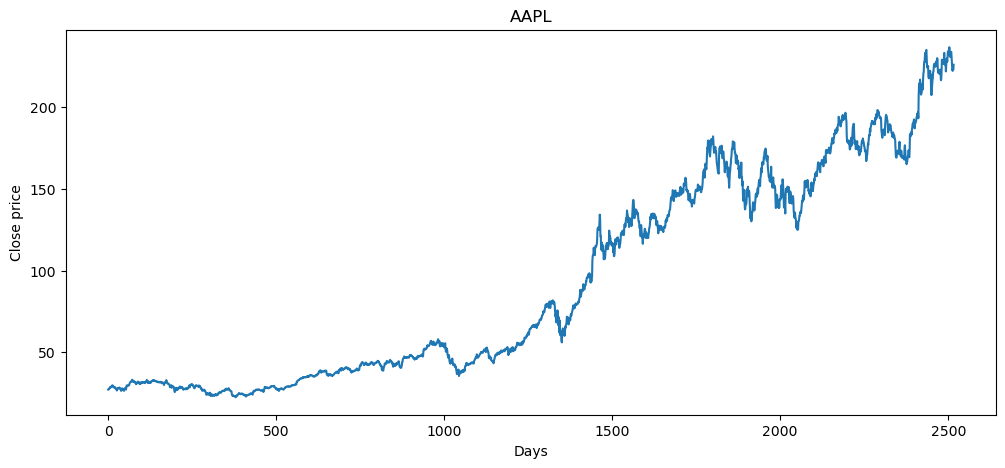

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

### 3. Feature Engineering

In [20]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA of 5 days ==> null null null null 30 40 ...... # Moving aveage

In [21]:
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[2:7])/5)

50.0


In [22]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [23]:
df1['Ma_5'] = df1.rolling(5).mean()
df1

,0,Ma_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


#### 100 days Moving Average

In [24]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2014-11-07 00:00:00+00:00,24.302620,27.252501,27.330000,27.137501,27.187500,134766000,NaN
1,2014-11-10 00:00:00+00:00,24.262493,27.207500,27.332500,27.167500,27.254999,108782000,NaN
2,2014-11-11 00:00:00+00:00,24.456446,27.424999,27.437500,27.100000,27.174999,109769200,NaN
3,2014-11-12 00:00:00+00:00,24.802000,27.812500,27.857500,27.342501,27.344999,187769600,NaN
4,2014-11-13 00:00:00+00:00,25.152020,28.205000,28.362499,27.900000,27.950001,238091600,NaN


In [25]:
df.head(103)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2014-11-07 00:00:00+00:00,24.302620,27.252501,27.330000,27.137501,27.187500,134766000,NaN
1,2014-11-10 00:00:00+00:00,24.262493,27.207500,27.332500,27.167500,27.254999,108782000,NaN
2,2014-11-11 00:00:00+00:00,24.456446,27.424999,27.437500,27.100000,27.174999,109769200,NaN
3,2014-11-12 00:00:00+00:00,24.802000,27.812500,27.857500,27.342501,27.344999,187769600,NaN
4,2014-11-13 00:00:00+00:00,25.152020,28.205000,28.362499,27.900000,27.950001,238091600,NaN
...,...,...,...,...,...,...,...,...
98,2015-04-01 00:00:00+00:00,27.809534,31.062500,31.280001,30.775000,31.205000,162485600,NaN
99,2015-04-02 00:00:00+00:00,28.049025,31.330000,31.389999,31.047501,31.257500,128880400,29.51720
100,2015-04-06 00:00:00+00:00,28.503374,31.837500,31.877501,31.082500,31.117500,148776000,29.56305


Text(0, 0.5, 'Price')

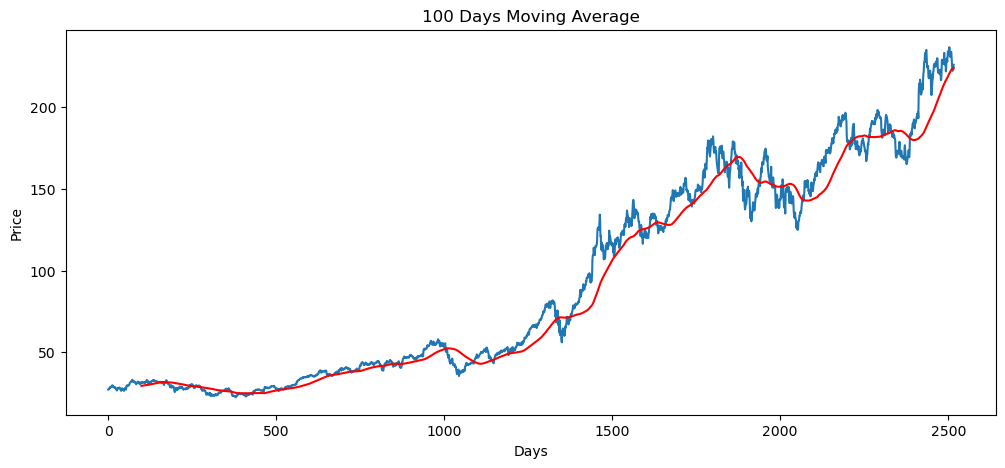

In [26]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

#### 200 days Moving Average

In [27]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2014-11-07 00:00:00+00:00,24.302620,27.252501,27.330000,27.137501,27.187500,134766000,NaN,NaN
1,2014-11-10 00:00:00+00:00,24.262493,27.207500,27.332500,27.167500,27.254999,108782000,NaN,NaN
2,2014-11-11 00:00:00+00:00,24.456446,27.424999,27.437500,27.100000,27.174999,109769200,NaN,NaN
3,2014-11-12 00:00:00+00:00,24.802000,27.812500,27.857500,27.342501,27.344999,187769600,NaN,NaN
4,2014-11-13 00:00:00+00:00,25.152020,28.205000,28.362499,27.900000,27.950001,238091600,NaN,NaN
...,...,...,...,...,...,...,...,...,...
198,2015-08-24 00:00:00+00:00,23.281553,25.780001,27.200001,23.000000,23.717501,648825200,31.305300,NaN
199,2015-08-25 00:00:00+00:00,23.421530,25.934999,27.777500,25.875000,27.777500,414406400,31.251350,30.384275
200,2015-08-26 00:00:00+00:00,24.764862,27.422501,27.472500,26.262501,26.772499,387098400,31.207200,30.385125


Text(0, 0.5, 'Price')

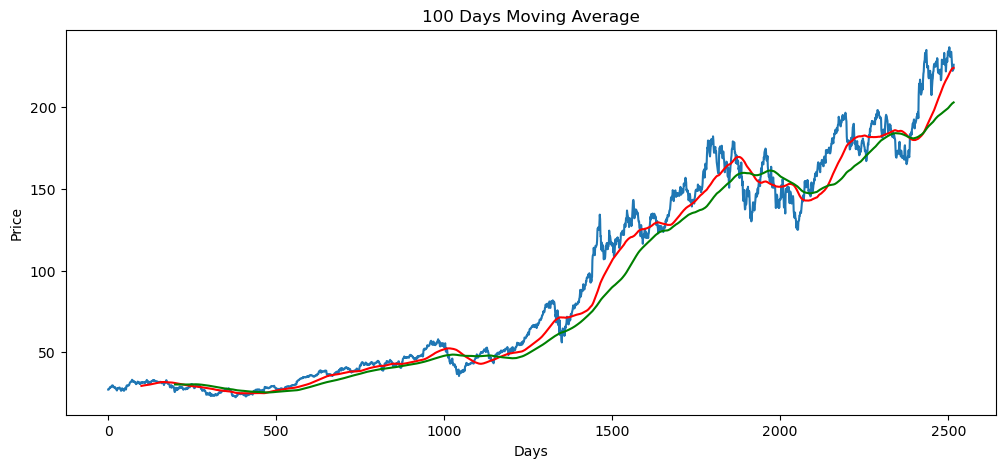

In [28]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

In [29]:
df

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2014-11-07 00:00:00+00:00,24.302620,27.252501,27.330000,27.137501,27.187500,134766000,NaN,NaN
1,2014-11-10 00:00:00+00:00,24.262493,27.207500,27.332500,27.167500,27.254999,108782000,NaN,NaN
2,2014-11-11 00:00:00+00:00,24.456446,27.424999,27.437500,27.100000,27.174999,109769200,NaN,NaN
3,2014-11-12 00:00:00+00:00,24.802000,27.812500,27.857500,27.342501,27.344999,187769600,NaN,NaN
4,2014-11-13 00:00:00+00:00,25.152020,28.205000,28.362499,27.900000,27.950001,238091600,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2512,2024-11-01 00:00:00+00:00,222.910004,222.910004,225.350006,220.270004,220.970001,65276700,223.496801,202.15245
2513,2024-11-04 00:00:00+00:00,222.009995,222.009995,222.789993,219.710007,220.990005,44944500,223.586200,202.30470
2514,2024-11-05 00:00:00+00:00,223.449997,223.449997,223.949997,221.139999,221.800003,28111300,223.678300,202.45250


#### Calculating % Changer In Each Trading Session

In [30]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,27.252501,NaN
1,27.207500,-0.001651
2,27.424999,0.007994
3,27.812500,0.014129
4,28.205000,0.014112
...,...,...
2512,222.910004,-0.013280
2513,222.009995,-0.004038
2514,223.449997,0.006486


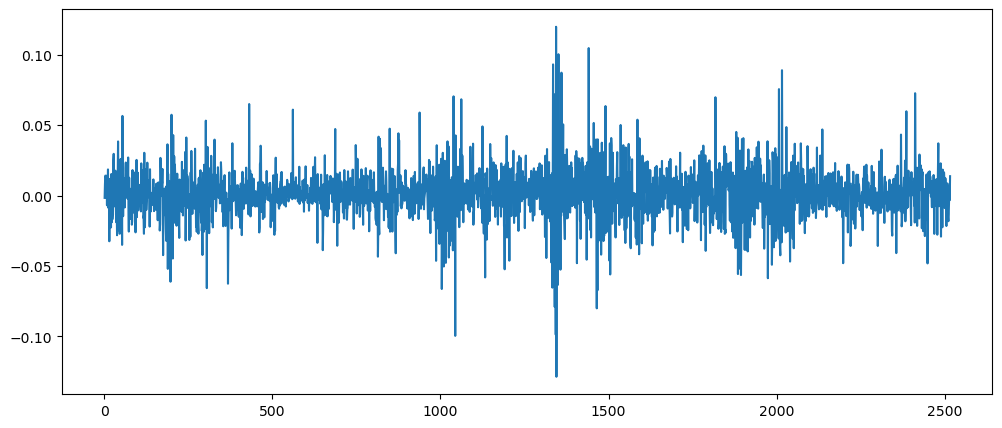

In [31]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

### 4. Data Preprocessing

In [32]:
# Install scikit-learn, keras and tensorflow on the 'stockenv' evironment
# conda install scikit-learn keras tensorflow

# It's normal if obtain a error when try installing the tensorflow, because the incompatibility of the python version
# In that case try to install with pip via jupyter notebook, or create a new conda env with the compatibel python version

In [33]:
df.shape

(2517, 10)

In [34]:
# Splitting Data into  Training & Testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): len(df)])

print(data_training)
print(data_testing)

Ticker        AAPL
0        27.252501
1        27.207500
2        27.424999
3        27.812500
4        28.205000
...            ...
1756    149.800003
1757    148.960007
1758    150.020004
1759    151.490005
1760    150.960007

[1761 rows x 1 columns]
Ticker        AAPL
1761    151.279999
1762    150.440002
1763    150.809998
1764    147.919998
1765    147.869995
...            ...
2512    222.910004
2513    222.009995
2514    223.449997
2515    222.720001
2516    225.779999

[756 rows x 1 columns]


In [35]:
data_training

Ticker,AAPL
0,27.252501
1,27.207500
2,27.424999
3,27.812500
4,28.205000
...,...
1756,149.800003
1757,148.960007
1758,150.020004
1759,151.490005


In [36]:
data_testing

Ticker,AAPL
1761,151.279999
1762,150.440002
1763,150.809998
1764,147.919998
1765,147.869995
...,...
2512,222.910004
2513,222.009995
2514,223.449997
2515,222.720001


In [37]:
# Scaling down the data between 0 and 1

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [39]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03480483],
       [0.03446927],
       [0.03609112],
       ...,
       [0.95026287],
       [0.96122444],
       [0.95727232]])

In [40]:
type(data_training_array)

numpy.ndarray

In [41]:
data_training_array.shape

(1761, 1)

### 5. Sequence Creation

In [42]:
# Tomorrow stoc price is dependent on previous few days stock price

In [43]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [44]:
x_train.ndim

3

In [45]:
y_train.ndim

1

In [46]:
x_train.shape

(1661, 100, 1)

In [47]:
y_train.shape

(1661,)

### 6. Building Machine Learning Model

In [48]:
# It's normal if obtain a error when try installing the tensorflow, because the incompatibility of the python version
# In that case try to install with pip via jupyter notebook, or create a new conda env with the compatibel python version
# !pip install tensorflow

In [49]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [50]:
import sys
print(sys.executable)

C:\Users\rocha\anaconda3\envs\stockenv\python.exe


In [51]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [52]:
model = Sequential()  # Model that accept sequencial data

model.add(Input(shape=(100, 1))) # that means that accept the last 100 sequencial data, in this case the close Price
model.add(LSTM(units=128, activation='tanh', return_sequences=True)) # i want that layer has 128 neurons
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

### 7. Model Training

In [53]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 0.0361
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 5.9440e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.4480e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 4.2052e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 5.0962e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.4868e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 4.8234e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 4.1072e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 3.5101e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 3.4878e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 3.4694e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.9484e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 3.3333e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.7465e-04
Epoch 15/50
52/52

In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [55]:
# Save the trained model
model.save('stock_prediction_model.keras')

In [57]:
import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\rocha\Desktop\stock-prediction-portal\Resources


In [62]:
#model = load_model('/Users/rocha/Desktop/stock-prediction-portal/backend-drf/stock_prediction_model.keras')
model1 = load_model(r'C:\Users\rocha\Desktop\stock-prediction-portal\backend-drf\stock_prediction_model.keras')

In [59]:
#from tensorflow.keras.models import load_model
from keras.models import load_model

# Load the previous saved trained model
model1 = load_model('stock_prediction_model.keras')

In [63]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

### 8. Preparing Test Data

In [53]:
data_training.tail()

Ticker,AAPL
1756,148.850006
1757,152.570007
1758,149.800003
1759,148.960007
1760,150.020004


In [54]:
data_testing

Ticker,AAPL
1761,151.490005
1762,150.960007
1763,151.279999
1764,150.440002
1765,150.809998
...,...
2511,233.669998
2512,230.100006
2513,225.910004
2514,222.910004


In [55]:
past_100_days = data_training.tail(100)

In [56]:
past_100_days

Ticker,AAPL
1661,130.479996
1662,129.639999
1663,130.149994
1664,131.789993
1665,130.460007
...,...
1756,148.850006
1757,152.570007
1758,149.800003
1759,148.960007


In [57]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,130.479996
1,129.639999
2,130.149994
3,131.789993
4,130.460007
...,...
850,233.669998
851,230.100006
852,225.910004
853,222.910004


In [58]:
input_data = scaler.fit_transform(final_df)
input_data[:10]

array([[0.04898618],
       [0.04144987],
       [0.04602546],
       [0.06073925],
       [0.04880684],
       [0.06531497],
       [0.08038758],
       [0.07787547],
       [0.0752737 ],
       [0.07258213]])

In [59]:
input_data.shape

(855, 1)

In [60]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [61]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [62]:
x_test

array([[[0.04898618],
        [0.04144987],
        [0.04602546],
        ...,
        [0.22232197],
        [0.21478567],
        [0.22429578]],

       [[0.04144987],
        [0.04602546],
        [0.06073925],
        ...,
        [0.21478567],
        [0.22429578],
        [0.23748438]],

       [[0.04602546],
        [0.06073925],
        [0.04880684],
        ...,
        [0.22429578],
        [0.23748438],
        [0.23272932]],

       ...,

       [[0.61098151],
        [0.73685625],
        [0.7899696 ],
        ...,
        [0.97236675],
        [0.97478918],
        [0.94275983]],

       [[0.73685625],
        [0.7899696 ],
        [0.80046662],
        ...,
        [0.97478918],
        [0.94275983],
        [0.90516784]],

       [[0.7899696 ],
        [0.80046662],
        [0.78476592],
        ...,
        [0.94275983],
        [0.90516784],
        [0.87825236]]])

In [63]:
x_test[0]

array([[0.04898618],
       [0.04144987],
       [0.04602546],
       [0.06073925],
       [0.04880684],
       [0.06531497],
       [0.08038758],
       [0.07787547],
       [0.0752737 ],
       [0.07258213],
       [0.08756507],
       [0.10147143],
       [0.10712372],
       [0.10990497],
       [0.13403921],
       [0.15252115],
       [0.17539934],
       [0.1634668 ],
       [0.18024407],
       [0.17477125],
       [0.18499913],
       [0.2164902 ],
       [0.21047909],
       [0.191728  ],
       [0.15637897],
       [0.18957471],
       [0.18284584],
       [0.19540648],
       [0.21119685],
       [0.21505481],
       [0.19513734],
       [0.17907769],
       [0.18499913],
       [0.18697294],
       [0.18392255],
       [0.20043069],
       [0.1967522 ],
       [0.19773911],
       [0.18948504],
       [0.18903642],
       [0.18464032],
       [0.18697294],
       [0.21415757],
       [0.21604172],
       [0.23416471],
       [0.22582098],
       [0.19145886],
       [0.194

### 9. Making Prediction

In [64]:
y_predicted  = model.predict(x_test)

24/24 [==============================] - 2s 31ms/step


In [6]:
y_predicted

In [3]:
y_test

In [68]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [1]:
y_predicted

In [2]:
y_test

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

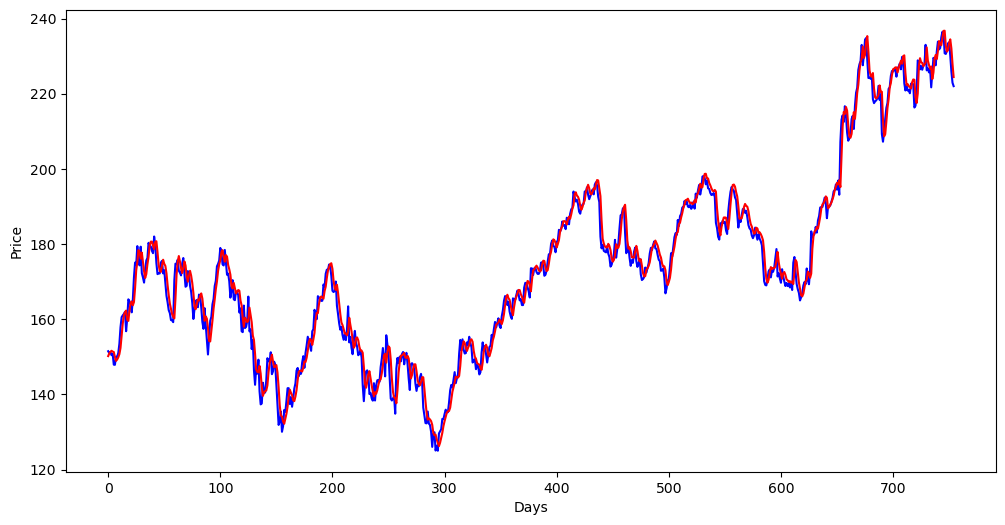

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend

(140.0, 240.0)

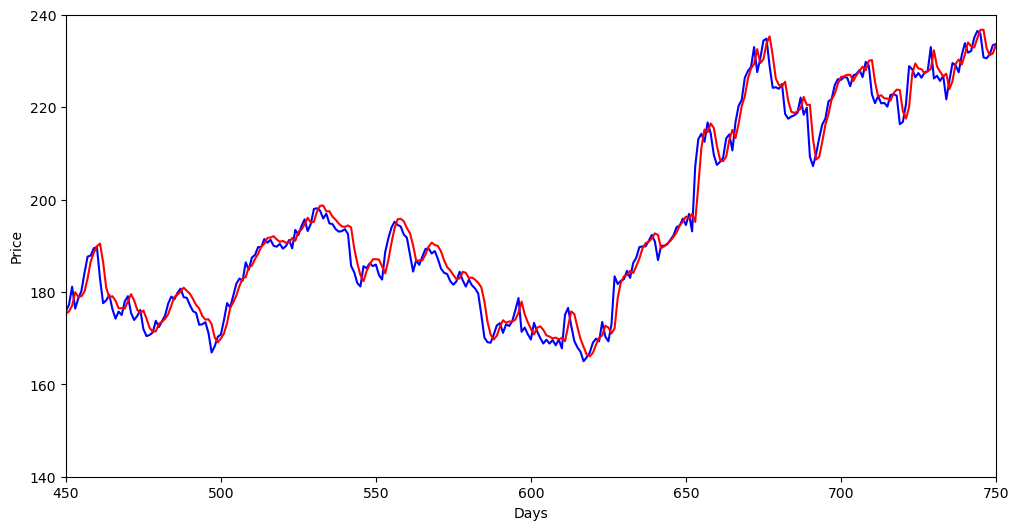

In [75]:
# Zoom one window of the previous graph
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend
plt.xlim(450, 750) # zoom x
plt.ylim(140, 240) # zoom y

### 10. Model Evaluation

In [84]:
# Means Squared Error (MSE
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean Squared Error (MSE): {mse}')
# Low mse means greater accuracy

Mean Squared Error (MSE): 10.979068780258308


In [82]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 3.3134677877200356


In [85]:
# R-Squared (should be bettween 0 and 1, near 1 is very good
r2 = r2_score(y_test, y_predicted)
print(f'R-Squared: {r2}')

R-Squared: 0.982946660652644


### 11. Git Push

In [ ]:
git status
git add -A / or git add .
git commit -m 'stock prediction resources'
git push origin main